In [1]:
# Import the random module.
import random
import numpy as np

In [2]:
random.randint(-90,90)

6

In [3]:
random.random()

0.9080742185414641

In [4]:
random_number = random.randint(-90,89) + random.random()
random_number

-53.04988543561153

In [5]:
x = 1
latitudes = []
while x < 11:
    random_lat = random.randint(-90, 89) + random.random()
    latitudes.append(random_lat)
    x += 1

In [6]:
latitudes


[1.6882536775642212,
 37.2639503662488,
 75.95939339471236,
 82.47288130559025,
 -64.70262470794208,
 -13.6418646966921,
 -25.048979231420688,
 -46.97871727786039,
 -6.473770062253324,
 30.51984616044394]

The randrange() Function
The randrange() function behaves differently than the previous two functions. Inside the parentheses, we need to add two numbers, a lower and upper limit, separated by a comma.

For the randrange() function, there is an option to add a step parameter and set it equal to an integer, which will generate increments of a given integer value, from the lower to the upper limit.

For example, add random.randrange(-90, 90, step=1) to a new cell and run the cell. The output is a number between -90 and 90, where the step is the difference between each number in the sequence.
This function might help us by combining the random.randrange() and random.random() functions to generate a floating-point decimal between –90 and 90, like we did with the random.randint() and random.random() functions.


In [7]:
random.randrange(-90,90,step = 3)

36

In [8]:
random.uniform(-90,90)

40.02906948167163

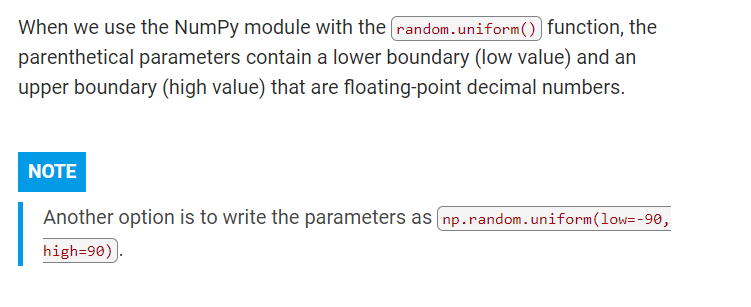

In [9]:
np.random.uniform(-90.000,90.000)

-17.478761599271635

To generate more than one floating-point decimal number between –90 and 90, we can add the size parameter when we use the NumPy module and set that equal to any whole number.

In [10]:
np.random.uniform(-90.000, 90.000, size=1500)

array([ 16.78527535, -78.9860076 ,  14.65490699, ..., -30.17689347,
        52.10918576, -47.78628946])

In [11]:
# Import timeit.
import timeit

In [12]:
%timeit np.random.uniform(-90.000, 90.000, size=1500)

12.2 µs ± 11.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [13]:
def latitudes(size):
    latitudes = []
    x = 0
    while x < (size):
        random_lat = random.randint(-90, 90) + random.random()
        latitudes.append(random_lat)
        x += 1
    return latitudes
# Call the function with 1500.
%timeit latitudes(1500)

1.61 ms ± 4.62 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [14]:
def latitudes(size):
    latitudes = []
    x = 0
    for i in range(1500):
            random_lat = random.randint(-90, 90) + random.random()
            latitudes.append(random_lat)
            x += 1
    return latitudes


In [15]:
# Call the function with 1500.
%timeit latitudes(1500)

1.62 ms ± 3.42 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [16]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [17]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [18]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


To determine if maximum temperature correlates to latitude, we can plot a linear regression line, a straight trendline predicting the average y-value, or dependent variable, for a given x-value, or independent variable. This line can be plotted using the equation y = mx + b, where "m" is the slope of the line and "b" is the y-intercept. For every x-value, or latitude we use in the equation, we will get a predicted temperature value.

Now we can calculate the ideal temperatures (y-values) using the slope and intercept from the equation of the regression line. To do this, perform list comprehension on the latitudes by multiplying each latitude by the slope and adding the intercept.

Add the following code in a new cell and run the cell.

# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

In [19]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

In [20]:
regress_values


[73.68973782871005,
 73.05563705897195,
 89.2704995994175,
 76.27143381978658,
 56.750188694278094,
 61.64182320368626,
 81.29894706556718,
 86.00940992647874,
 87.18702564170663,
 63.72529716139714]

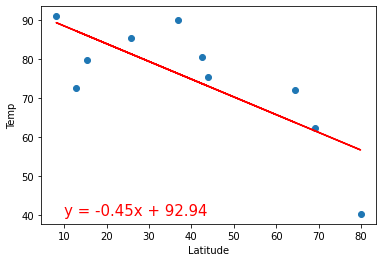

In [21]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()